In [1]:
import pandas as pd

data = pd.read_parquet("splunk_agg_data_24-05-05__24-07-23.parquet")

data = data.dropna()

# filter data from 24-05-05 11:00:00 to 24-05-07 10:00:00
data = data[
    (data["time"] >= "2024-05-05 11:00:00") & (data["time"] <= "2024-05-07 10:00:00")
]

data_subset = data[
    ["request_amount", "error_count"]
]
data_time = data["time"]

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='request_amount'>, <Axes: ylabel='error_count'>],
       dtype=object))

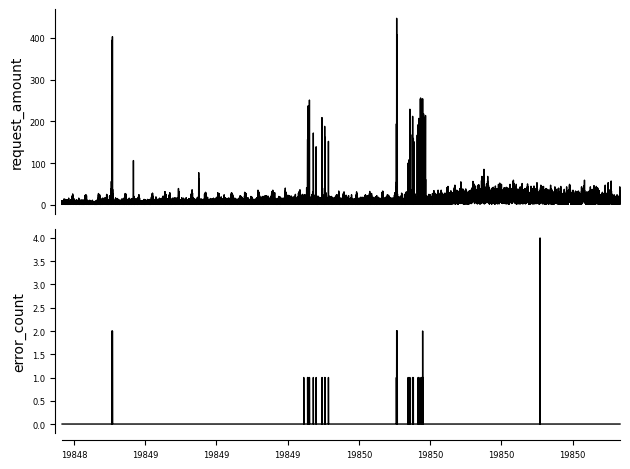

In [2]:
from tigramite import data_processing as pp
from tigramite import plotting as tp

dataframe = pp.DataFrame(data_subset.values, var_names=data_subset.columns, datatime=data_time.values)

tp.plot_timeseries(dataframe)

In [3]:
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests.gsquared import Gsquared

cond_ind_test = Gsquared()
lpcmci = LPCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)
tau_max = 10

results = lpcmci.run_lpcmci(tau_max=tau_max)

(<Figure size 600x600 with 1 Axes>, <Axes: >)

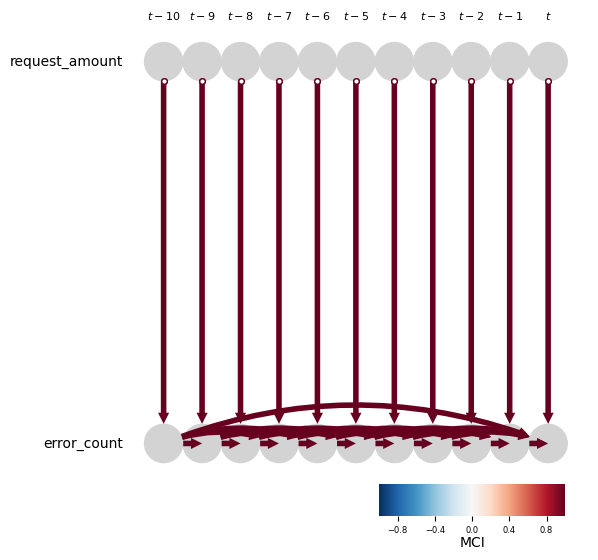

In [4]:
tp.plot_time_series_graph(
    figsize=(6, 6),
    val_matrix=results["val_matrix"],
    graph=results["graph"],
    var_names=data_subset.columns,
    link_colorbar_label="MCI",
)

In [ ]:
tp.plot_graph(
    val_matrix=results["val_matrix"],
    graph=results["graph"],
    var_names=data_subset.columns,
    link_colorbar_label="cross-MCI",
    node_colorbar_label="auto-MCI",
)